# Cleaning of Excel files. Saving them as csvs and adjusting the 13 tables. They all had headers starting in different rows positions and had some subheaders and the  actual values for the columns starting in different rows for each table.

In [1]:
pip install pandas openpyxl


Note: you may need to restart the kernel to use updated packages.


In [2]:

import pandas as pd

excel_file_path = "2Annual fund-level superannuation statistics back series June 2004 to June 2022.xlsx"

# Define the sheets to extract
sheets_to_extract = ["Table 1", "Table 2a", "Table 2b","Table 4","Table 8"]

# Load the Excel file
xls = pd.ExcelFile(excel_file_path)

# Iterate through the selected sheets and save them as CSV
for sheet_name in sheets_to_extract:
    # Load the sheet into a DataFrame
    df = pd.read_excel(xls, sheet_name, header=4)  # Header starts at row 5
    df = df[2:]  # Values start at row 8, so we skip the rows before that
    
    # Define the CSV file name
    csv_file_name = f"{sheet_name}.csv"
    
    # Save the DataFrame as a CSV file
    df.to_csv(csv_file_name, index=False)

print("CSV files saved successfully!")



CSV files saved successfully!


In [3]:
import pandas as pd

# Define the Excel file path
excel_file_path = "2Annual fund-level superannuation statistics back series June 2004 to June 2022.xlsx"

# Define the sheets to extract
sheets_to_extract = ["Table 3a", "Table 3b"]

# Load the Excel file
xls = pd.ExcelFile(excel_file_path)

# Iterate through the selected sheets and save them as CSV
for sheet_name in sheets_to_extract:
    # Load the sheet into a DataFrame
    df = pd.read_excel(xls, sheet_name, header=4)  # Header starts at row 5
    df = df[3:]  # Values start at row 8, so we skip the rows before that
    
    # Define the CSV file name
    csv_file_name = f"{sheet_name}.csv"
    
    # Save the DataFrame as a CSV file
    df.to_csv(csv_file_name, index=False)

print("CSV files saved successfully!")


CSV files saved successfully!


In [4]:
import pandas as pd

# Define the Excel file path
excel_file_path = "2Annual fund-level superannuation statistics back series June 2004 to June 2022.xlsx"

# Define the sheets you want to extract
sheets_to_extract = ["Table 6"]

# Load the Excel file
xls = pd.ExcelFile(excel_file_path)

# Iterate through the selected sheets and save them as CSV
for sheet_name in sheets_to_extract:
    # Load the sheet into a DataFrame
    df = pd.read_excel(xls, sheet_name, header=6)  # Header starts at row 5
    df = df[2:]  # Values start at row 8, so we skip the rows before that
    
    # Define the CSV file name
    csv_file_name = f"{sheet_name}.csv"
    
    # Save the DataFrame as a CSV file
    df.to_csv(csv_file_name, index=False)

print("CSV files saved successfully!")


CSV files saved successfully!


In [5]:
import pandas as pd

# Define the Excel file path
excel_file_path = "2Annual fund-level superannuation statistics back series June 2004 to June 2022.xlsx"

# Define the sheets to extract
sheets_to_extract = ["Table 9","Table 10","Table 11","Table 12","Table 13"]

# Load the Excel file
xls = pd.ExcelFile(excel_file_path)

# Iterate through the selected sheets and save them as CSV
for sheet_name in sheets_to_extract:
    # Load the sheet into a DataFrame
    df = pd.read_excel(xls, sheet_name, header=5)  # Header starts at row 5
    df = df[2:]  # Values start at row 8, so we skip the rows before that
    
    # Define the CSV file name
    csv_file_name = f"{sheet_name}.csv"
    
    # Save the DataFrame as a CSV file
    df.to_csv(csv_file_name, index=False)

print("CSV files saved successfully!")

CSV files saved successfully!


Join tables with same info. 


In [12]:
import pandas as pd


df1 = pd.read_csv('Table 2a.csv')  


df2 = pd.read_csv('Table 2b.csv')  

merged_df = pd.concat([df1, df2], axis=0, ignore_index=True)



In [14]:
merged_df.to_csv('Table2a2b_merged.csv', index=False)


In [15]:
merged_df.columns


Index(['Period', 'Fund name', 'ABN', 'RSE Regulatory classification',
       'Fund type', 'RSE Membership base', 'Fund's RSE licensee',
       'RSE licensee ownership type', 'RSE licensee profit status',
       'RSE licensee board structure', 'RSE Balance date', 'Duration',
       'RSE Wind up date', 'Total assets',
       'Proportion of benefits which are defined benefits',
       'Number of investment options', 'Number of MySuper products authorised',
       'Proportion of total assets in default or MySuper strategy',
       'Net members' benefits outflow ratio', 'Investment expenses ratio',
       'Operating expense ratio', 'One-year\nrate of return',
       'Five-year\nrate of return', 'Ten-year\nrate of return',
       'Total number of member accounts', 'Total members' benefits',
       'Average member account balance',
       'Growth in number of member accounts'],
      dtype='object')

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [36]:
merged_df.shape


(1664, 25)

In [40]:
merged_df.isnull().sum()

Period                                   0
Fund name                                0
ABN                                      0
RSE Regulatory classification            0
Fund type                                0
RSE Membership base                      0
Fund's RSE licensee                      0
RSE licensee ownership type              0
RSE licensee profit status               0
RSE licensee board structure             0
RSE Balance date                         0
Duration                                 0
Total assets                             0
Number of investment options             0
Net members' benefits outflow ratio     33
Investment expenses ratio               36
Operating expense ratio                 36
One-year\nrate of return                38
Five-year\nrate of return              109
Ten-year\nrate of return               239
Total number of member accounts        245
Total members' benefits                260
Average member account balance         272
Growth in n

In [39]:
columns_to_drop_by_index = [13]  
merged_df.drop(merged_df.columns[columns_to_drop_by_index], axis=1, inplace=True)



In [77]:
print(merged_df.dtypes)

Period                                  object
Fund name                               object
ABN                                    float64
RSE Regulatory classification           object
Fund type                               object
RSE Membership base                     object
Fund's RSE licensee                     object
RSE licensee ownership type             object
RSE licensee profit status              object
RSE licensee board structure            object
RSE Balance date                        object
Duration                                 int64
Total assets                           float64
Number of investment options           float64
Net members' benefits outflow ratio     object
Investment expenses ratio               object
Operating expense ratio                 object
One-year\nrate of return               float64
Five-year\nrate of return              float64
Ten-year\nrate of return               float64
Total number of member accounts        float64
Total members

In [44]:
merged_df.sort_values(by='Period', inplace=True)

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns


In [76]:
tofloat_cols = ['One-year\nrate of return','Five-year\nrate of return','Ten-year\nrate of return','Total assets','Number of investment options', 'Total number of member accounts','Average member account balance']
import pandas as pd
import numpy as np
#dataset contains * where values are masked to maintain privacy of members.
#to be able to perform my analysis, they will be replace by the median values of the columns.

# Replace '*' with NaN in the specified columns
for col in tofloat_cols:
    merged_df[col] = merged_df[col].replace('*', np.nan)

# Convert columns to float
merged_df[tofloat_cols] = merged_df[tofloat_cols].astype(float)

# Replace NaN values with the median for each column
median_values = merged_df.median()
merged_df[tofloat_cols] = merged_df[tofloat_cols].fillna(median_values)

/var/folders/p0/hyllg8rj5_5d3h8g4g3dfnjm0000gn/T/ipykernel_8573/1389360458.py:15: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_values = merged_df.median()


In [78]:
feature_cols = ['Total assets','Number of investment options', 'Total number of member accounts','Average member account balance']


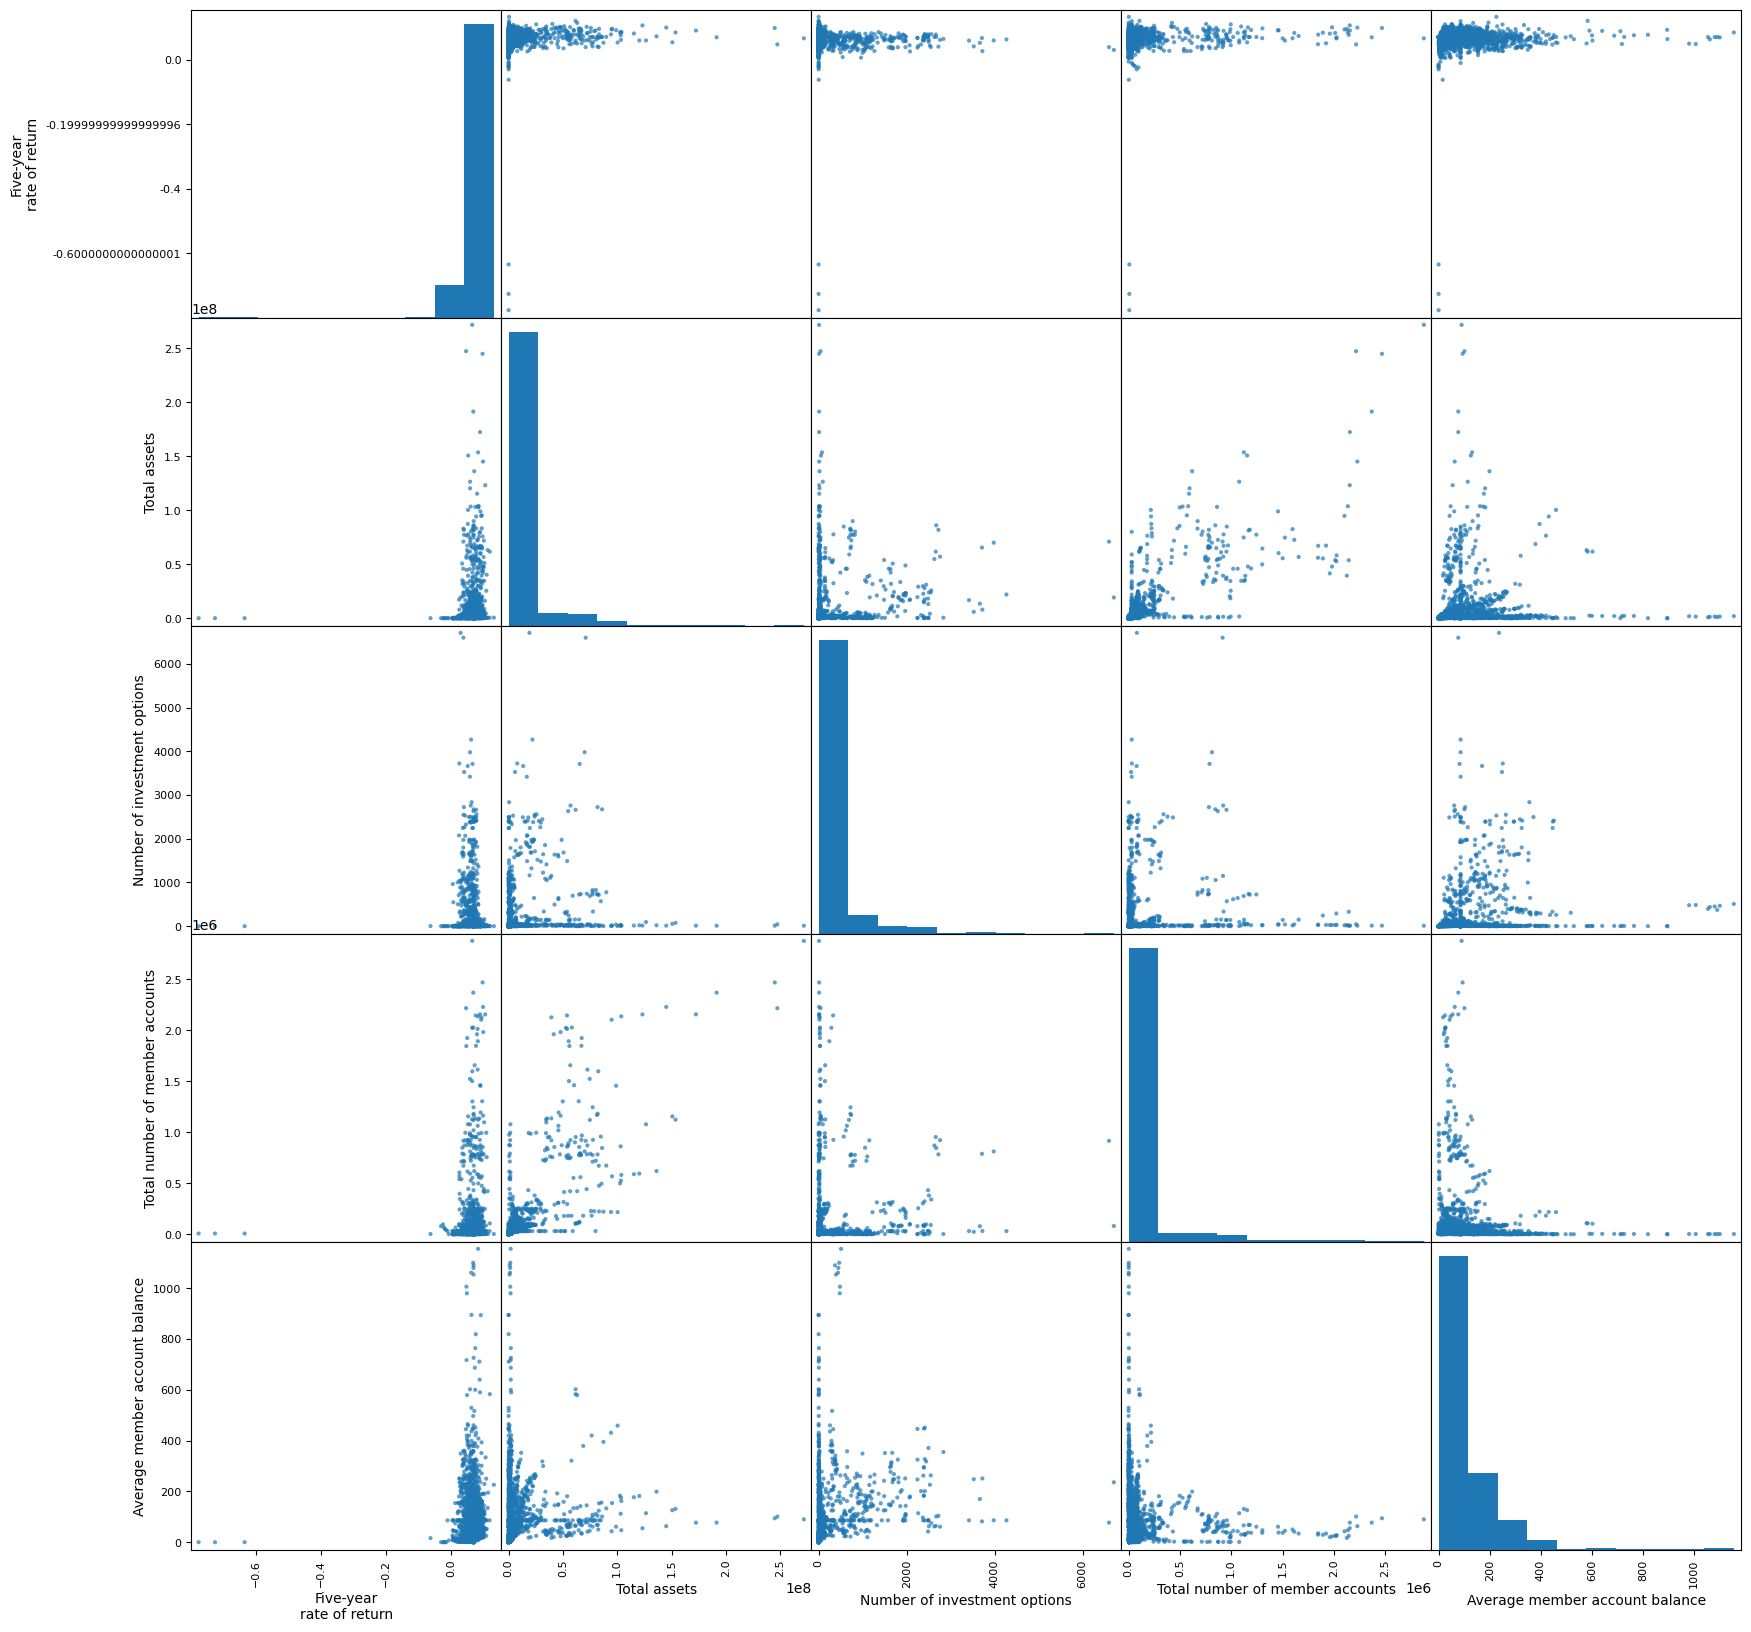

In [79]:
grr = pd.plotting.scatter_matrix(merged_df[['Five-year\nrate of return']+feature_cols], figsize=(20,20), alpha=0.7)

In [81]:
merged_df.corr()

/var/folders/p0/hyllg8rj5_5d3h8g4g3dfnjm0000gn/T/ipykernel_8573/4191659586.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_df.corr()


,ABN,Duration,Total assets,Number of investment options,One-year\nrate of return,Five-year\nrate of return,Ten-year\nrate of return,Total number of member accounts,Average member account balance
ABN,1.000000,-0.029969,0.081616,0.070938,-0.003391,0.008101,0.039720,0.123307,-0.008230
Duration,-0.029969,1.000000,0.017997,0.018306,-0.001664,0.005469,0.017915,0.017935,0.001866
Total assets,0.081616,0.017997,1.000000,0.132729,0.019854,0.079117,0.244997,0.771229,0.001708
Number of investment options,0.070938,0.018306,0.132729,1.000000,-0.043983,-0.066966,-0.115233,0.060995,0.171385
One-year\nrate of return,-0.003391,-0.001664,0.019854,-0.043983,1.000000,0.510571,0.132381,0.004438,0.013719
Five-year\nrate of return,0.008101,0.005469,0.079117,-0.066966,0.510571,1.000000,0.197030,0.063737,0.042572
Ten-year\nrate of return,0.039720,0.017915,0.244997,-0.115233,0.132381,0.197030,1.000000,0.127537,0.168676
Total number of member accounts,0.123307,0.017935,0.771229,0.060995,0.004438,0.063737,0.127537,1.000000,-0.159301
Average member account balance,-0.008230,0.001866,0.001708,0.171385,0.013719,0.042572,0.168676,-0.159301,1.000000


Index(['Period', 'Fund name', 'ABN', 'RSE Regulatory classification',
       'Fund type', 'RSE Membership base', 'Fund's RSE licensee',
       'RSE licensee ownership type', 'RSE licensee profit status',
       'RSE licensee board structure', 'RSE Balance date', 'Duration',
       'Total assets', 'Number of investment options',
       'Net members' benefits outflow ratio', 'Investment expenses ratio',
       'Operating expense ratio', 'One-year\nrate of return',
       'Five-year\nrate of return', 'Ten-year\nrate of return',
       'Total number of member accounts', 'Total members' benefits',
       'Average member account balance',
       'Growth in number of member accounts'],
      dtype='object')